# Initialization and dataset preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df = pd.read_csv('daily_data_2024-10-22.csv')
df['dates'] = pd.to_datetime(df['dates'])

/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/3455976666.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dates'] = pd.to_datetime(df['dates'])


In [3]:
df

,dates,Norway,Algeria,Russia,Azerbaijan,Libya,UK net flows,LNG,EU total,Nord Stream,Ukraine Gas Transit,"Yamal (BY,PL)",Turkstream,Russia (Sudzha)
0,2018-01-08,263.4,76.1,570.2,0.0,13.8,45.4,114.8,1083.8,174.4,266.1,110.1,NaN,NaN
1,2018-02-08,262.6,74.8,578.5,0.0,12.8,47.0,122.9,1098.6,170.6,277.5,110.2,NaN,NaN
2,2018-03-08,251.0,74.0,565.5,0.0,11.4,39.5,124.8,1066.2,170.3,263.8,110.3,NaN,NaN
3,2018-04-08,257.1,71.0,561.5,0.0,12.3,35.6,93.7,1031.1,170.6,258.8,110.3,NaN,NaN
4,2018-05-08,253.9,69.7,565.7,0.0,11.7,33.7,83.0,1017.8,170.1,263.9,110.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,2024-10-16,259.0,93.0,83.0,35.0,5.0,27.0,309.0,811.0,NaN,41.0,NaN,43.0,45
2269,2024-10-17,243.0,92.0,83.0,35.0,2.0,23.0,316.0,795.0,NaN,39.0,NaN,44.0,46
2270,2024-10-18,235.0,92.0,84.0,37.0,2.0,22.0,314.0,786.0,NaN,39.0,NaN,45.0,47
2271,2024-10-19,257.0,83.0,89.0,37.0,2.0,20.0,261.0,749.0,NaN,39.0,NaN,50.0,46


Using ARIMA model to predict 
 - Make sure series are stationarry using DF test
 - If not Try first differencing
  - - Retest using ADF
  - - If not Normalizing
  - - If yes Plot ACF and PACF to get the p,q
  - - Fit the model and predict
  - - If uncertain about p,q try different models (p,q) and compare their AIC, BIC, and predict using the one with the best values



# Russia Timeseries

## Russia Dickey Fueller Test

In [ ]:
# Perform the ADF test
result = adfuller(df['Russia'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -0.9753066664846265
p-value: 0.7621637587344547
Critical Value (1%): -3.433255799449242
Critical Value (5%): -2.862823704909085
Critical Value (10%): -2.56745337629031


### Given the timesteries are non stationnary, we perform ADF test after first differencing

In [5]:
# Perform the ADF test after first differencing
result = adfuller(df['Russia'].diff().dropna())

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -9.64144064378659
p-value: 1.5171162262520145e-16
Critical Value (1%): -3.433267467097435
Critical Value (5%): -2.862828856845257
Critical Value (10%): -2.567456119332679


First differencing yielded stationary results (p value below 5%)

## ACF, PACF for Russia

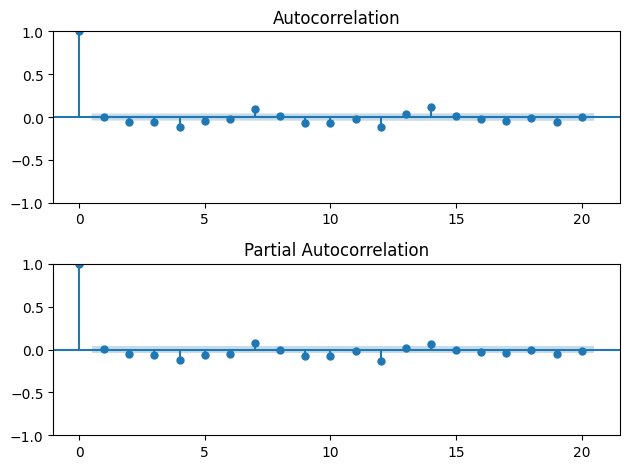

In [6]:
f, ax = plt.subplots(nrows=2, ncols=1)

plot_acf(df['Russia'].diff().dropna(),lags=20, ax=ax[0])
plot_pacf(df['Russia'].diff().dropna(),lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

Given the ACF and PACF cut off after 1 lag, we have p=q=1 after first differencing d=1

## Russia ARIMA(1,1,1) predictions

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 28.510314865782096


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/2016175120.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


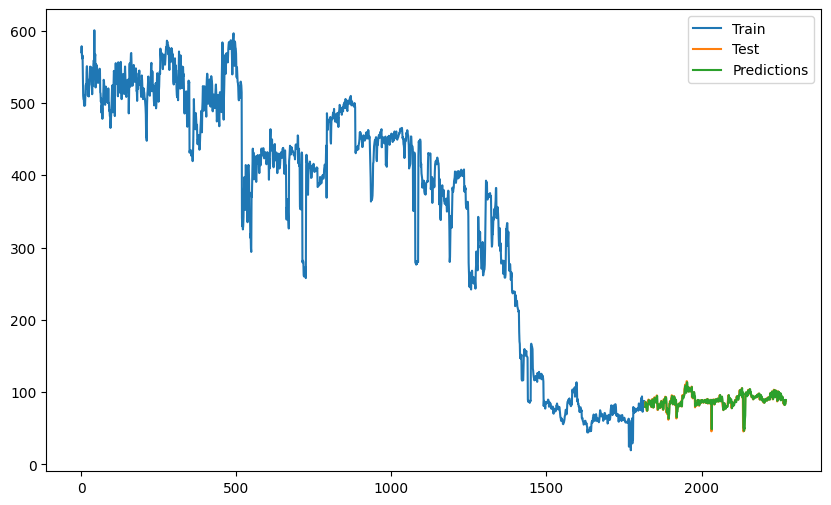

In [ ]:
#Setting train and test data size at 80% and 20% respectively, data is sorted by date 
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'Russia'


# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))

    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [8]:
print('The R^2 score for Russia flows time series is', r2_score(test['Russia'],test['predictions']))

The R^2 score for Russia flows time series is 0.6762587119769835


# Libya Timeseries

## ADF test for Libya

In [9]:
# Perform the ADF test
result = adfuller(df['Libya'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -2.2238174524667462
p-value: 0.19771492656084866
Critical Value (1%): -3.4332661660670696
Critical Value (5%): -2.8628282823666926
Critical Value (10%): -2.567455813463227


### Given the timesteries are non stationnary (p>5%), we perform ADF test after first differencing

In [11]:
# Perform the ADF test after first differencing
result = adfuller(df['Libya'].diff().dropna())

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -13.237418030574435
p-value: 9.31770837628117e-25
Critical Value (1%): -3.433267467097435
Critical Value (5%): -2.862828856845257
Critical Value (10%): -2.567456119332679


## ACF, PACF for Libya

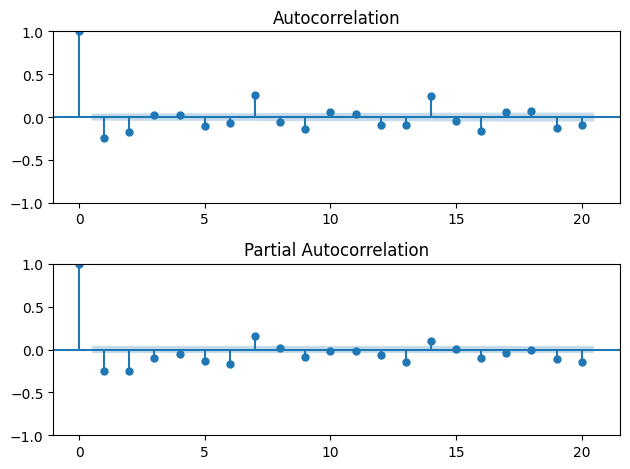

In [12]:
f, ax = plt.subplots(nrows=2, ncols=1)
plot_acf(df['Libya'].diff().dropna(),lags=20, ax=ax[0])
plot_pacf(df['Libya'].diff().dropna(),lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

Given the ACF and PACF cut off after 1 lag, we have p=q=1 after first differencing d=1

## Libya ARIMA (1,1,1)

Mean Squared Error: 2.336856039741527


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/2292841110.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


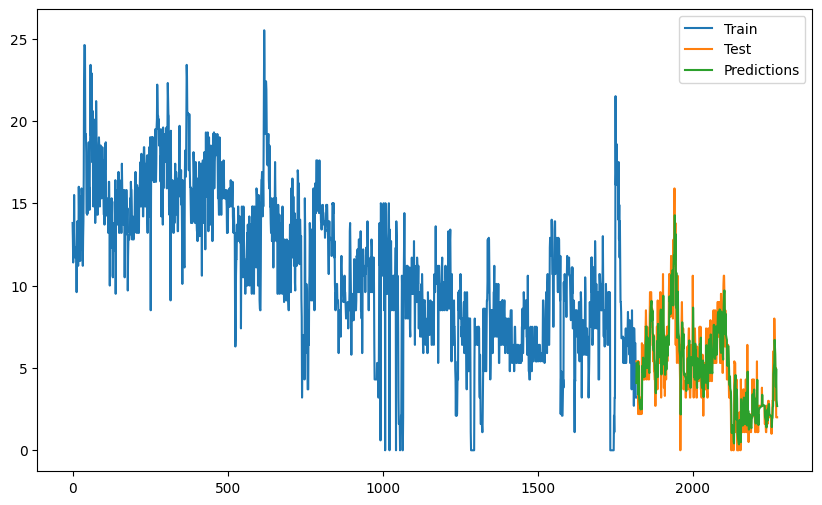

In [13]:
# Setting train and test data size at 80% and 20% respectively
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'Libya'


# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [14]:
print('The R^2 score for Libya flows time series is', r2_score(test['Libya'],test['predictions']))

The R^2 score for Libya flows time series is 0.6884741490500088


# Norway Timeseries

## ADF test for Norway

In [15]:
# Perform the ADF test
result = adfuller(df['Norway'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -6.2186212958486795
p-value: 5.290072496189308e-08
Critical Value (1%): -3.4332391099897013
Critical Value (5%): -2.8628163355201113
Critical Value (10%): -2.5674494526166383


### Given the timesteries are stationnary (p>5%)

## ACF, PACF for Norway

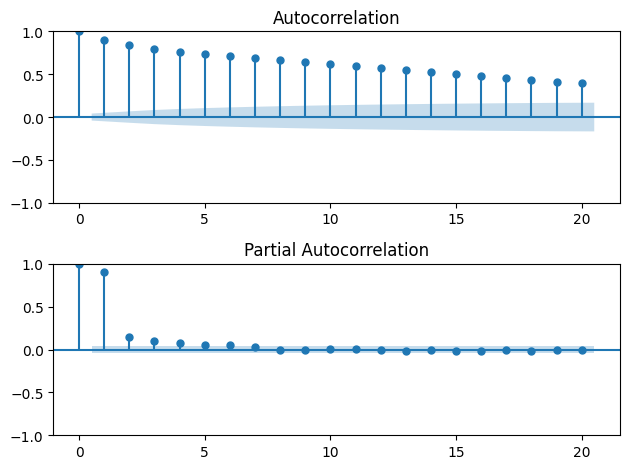

In [16]:
f, ax = plt.subplots(nrows=2, ncols=1)
plot_acf(df['Norway'],lags=20, ax=ax[0])
plot_pacf(df['Norway'],lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

Given the timeseries are stationnary, the ACF does not cut off, and PACF cut off after 1 lag, we have p=1 q= 0 d=0

## Norway ARIMA (1,0,0), so AR(1)

Mean Squared Error: 178.266159021205


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/341751952.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


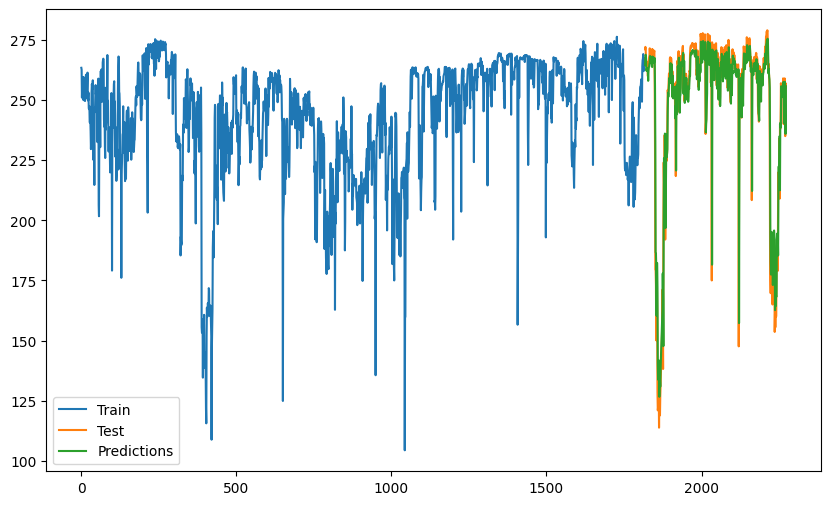

In [17]:
# Setting train and test data size at 80% and 20% respectively
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'Norway'


# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [18]:
print('The R^2 score for Norway flows time series is', r2_score(test['Norway'],test['predictions']))

The R^2 score for Norway flows time series is 0.8588316795776408


# Azerbaijan Timeseries

## ADF test for Azerbaijan

In [19]:
# Perform the ADF test
result = adfuller(df['Azerbaijan'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -1.0514767365300552
p-value: 0.7340297222320862
Critical Value (1%): -3.433255799449242
Critical Value (5%): -2.862823704909085
Critical Value (10%): -2.56745337629031


### Given the timesteries are non stationnary (p>5%), we perform ADF test after first differencing

In [20]:
# Perform the ADF test after first differencing
result = adfuller(df['Azerbaijan'].diff().dropna())

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -15.970353672821767
p-value: 7.015861915680848e-29
Critical Value (1%): -3.433255799449242
Critical Value (5%): -2.862823704909085
Critical Value (10%): -2.56745337629031


First differencing yielded stationary results (p value below 5%)

## ACF, PACF for Azerbaijan

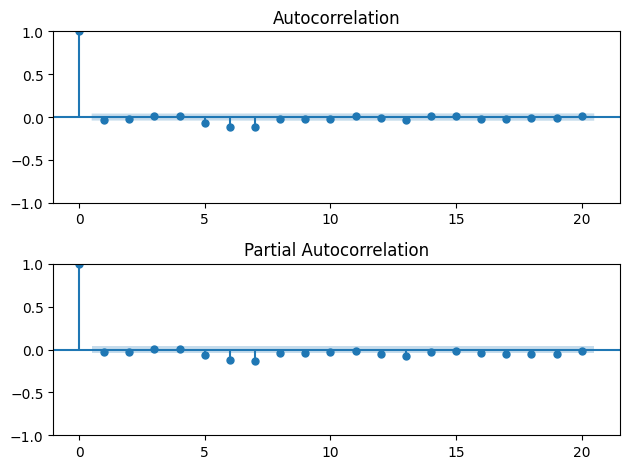

In [21]:
f, ax = plt.subplots(nrows=2, ncols=1)
plot_acf(df['Azerbaijan'].diff().dropna(),lags=20, ax=ax[0])
plot_pacf(df['Azerbaijan'].diff().dropna(),lags=20, ax=ax[1], method='ols')

# ax[0].annotate('Strong correlation at lag = 1', xy=(1, 0.5),  xycoords='data',
#             xytext=(0.15, 0.7), textcoords='axes fraction',
#             arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

Given the ACF and PACF cut off after 1 lag, we have p=q=1 after first differencing d=1

## Azerbaijan ARIMA(1,1,1)

Mean Squared Error: 6.27845263524406


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/1595502983.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


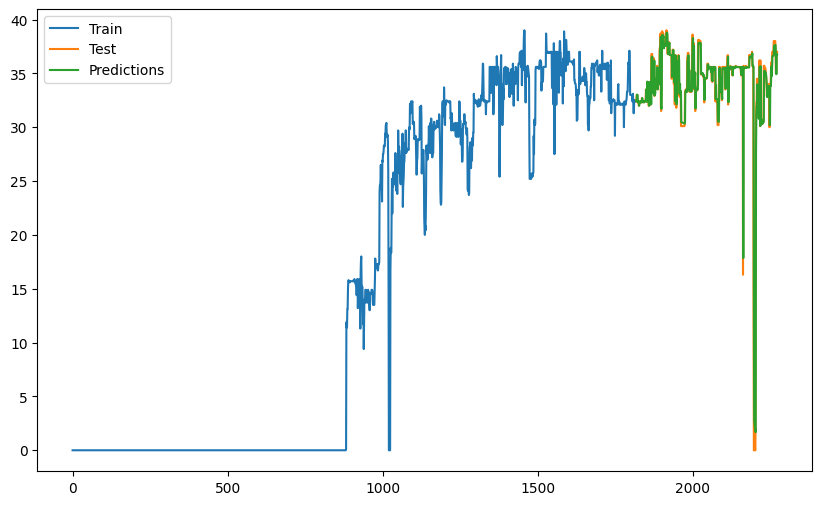

In [22]:
# Setting train and test data size at 80% and 20% respectively
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'Azerbaijan'

# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [23]:
print('The R^2 score for Azerbaijan flows time series is', r2_score(test['Azerbaijan'],test['predictions']))

The R^2 score for Azerbaijan flows time series is 0.7126243131185173


# Algeria Timeseries

## ADF test for Algeria

In [24]:
# Perform the ADF test
result = adfuller(df['Algeria'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -2.889386319003792
p-value: 0.0465962184320905
Critical Value (1%): -3.4332609735287223
Critical Value (5%): -2.862825989564547
Critical Value (10%): -2.5674545927076724


### Given the timesteries are stationnary (p>5%)

## ACF, PACF for Algeria

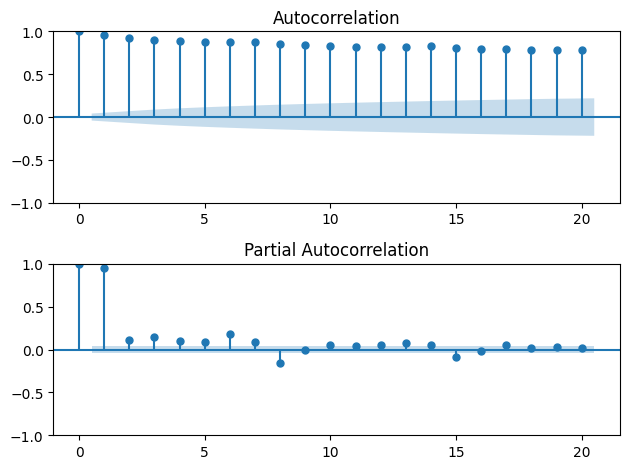

In [25]:
f, ax = plt.subplots(nrows=2, ncols=1)
plot_acf(df['Algeria'],lags=20, ax=ax[0])
plot_pacf(df['Algeria'],lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

Given the timeseries are stationnary, the ACF does not cut off, and PACF cut off after 2 lags, we have p=2 q= 0 d=0

## Algeria ARIMA(2,0,0) so AR(2)

Mean Squared Error: 86.31082826309502


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/2974752665.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


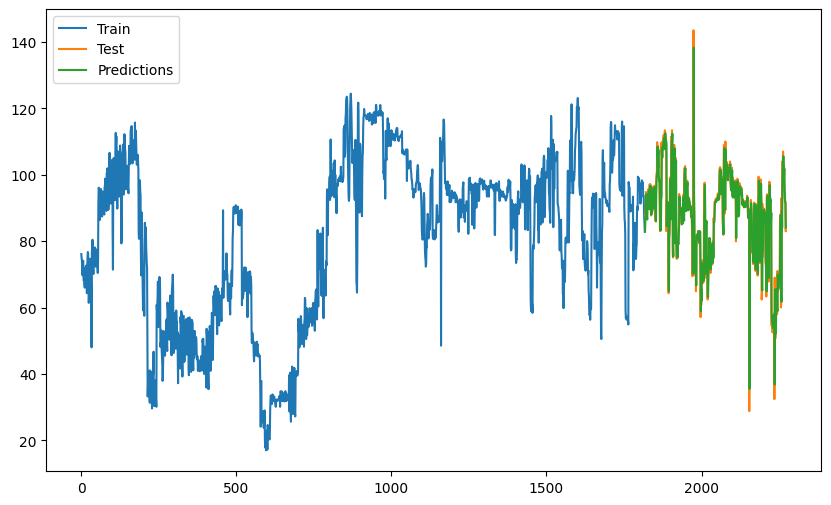

In [26]:
# Setting train and test data size at 80% and 20% respectively
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'Algeria'


# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(2, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [27]:
print('The R^2 score for Algeria flows time series is', r2_score(test['Algeria'],test['predictions']))

The R^2 score for Algeria flows time series is 0.5427853522781545


# UK Timeseries

## ADF test for the United kingdom

In [28]:
# Perform the ADF test
result = adfuller(df['UK net flows'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Print the critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Test Statistic: -3.596505612280023
p-value: 0.005828185427750458
Critical Value (1%): -3.4332442247528396
Critical Value (5%): -2.862818593996602
Critical Value (10%): -2.567450655093456


### Given the timesteries are stationnary (p>5%)

## ACF, PACF for UK

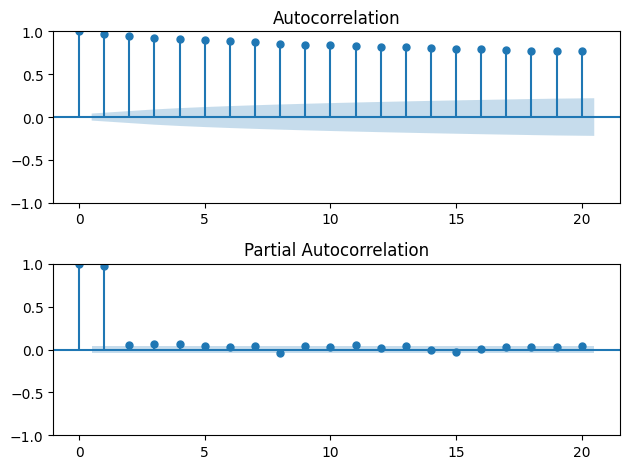

In [29]:
f, ax = plt.subplots(nrows=2, ncols=1)
plot_acf(df['UK net flows'],lags=20, ax=ax[0])
plot_pacf(df['UK net flows'],lags=20, ax=ax[1], method='ols')
plt.tight_layout()
plt.show()

Given the timeseries are stationnary, the ACF does not cut off, and PACF cut off after 2 lags, we have p=2 q= 0 d=0

## UK ARIMA(2,0,0) so AR(2)

Mean Squared Error: 41.258583356050266


/var/folders/61/rx75sld96qd38fjxnk640kvc0000gn/T/ipykernel_54726/4121471964.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


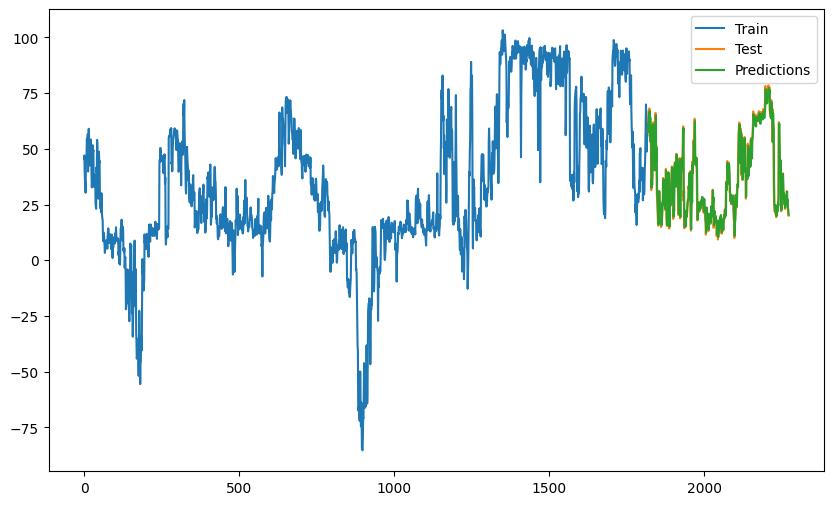

In [30]:
# Setting train and test data size at 80% and 20% respectively
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
value= 'UK net flows'

# Fitting ARIMA model
predictions = []
history = [x for x in train[value]]

for t in range(len(test)):
    model = ARIMA(history, order=(2, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[value].iloc[t]
    history.append(obs)

test['predictions'] = predictions

# Evaluating the model
mse = mean_squared_error(test[value], test['predictions'])
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train[value], label='Train')
plt.plot(test[value], label='Test')
plt.plot(test['predictions'], label='Predictions')
plt.legend()
plt.show()

In [31]:
print('The R^2 score for UK flows time series is', r2_score(test['UK net flows'],test['predictions']))

The R^2 score for UK flows time series is 0.8688493605816874
